In [2]:
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer, LabelEncoder
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet, Ridge, Lasso
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import seaborn as sns

from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import History
import keras

2024-04-14 10:01:10.708418: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 10:01:10.708544: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 10:01:10.882821: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')
train.drop(columns=['id'], axis=1, inplace=True)
test.drop(columns=['id'], axis=1, inplace=True)
encoder = LabelEncoder()
train['Sex'] = encoder.fit_transform(train['Sex'])
test['Sex'] = encoder.transform(test['Sex'])

In [4]:
X = train.drop(columns=['Rings'], axis=1)
y= train['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=0.24)

minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()
power = PowerTransformer()

X_train_minmax = minmax.fit_transform(X_train)
X_train_standard = standard.fit_transform(X_train)
X_train_robust = robust.fit_transform(X_train)
X_train_power = power.fit_transform(X_train)

X_test_minmax = minmax.transform(X_test)
X_test_standard = standard.transform(X_test)
X_test_robust = robust.transform(X_test)
X_test_power = power.transform(X_test)

test_minmax = minmax.transform(test)
test_standard = standard.transform(test)
test_robust = robust.transform(test)
test_power = power.transform(test)

In [5]:
hist_minmax = HistGradientBoostingRegressor(**{'learning_rate': 0.14927306256853437, 
                                               'max_iter': 286, 
                                               'max_depth': 6, 
                                               'min_samples_leaf': 9}).fit(X_train_minmax, y_train)
hist_standard = HistGradientBoostingRegressor(**{'learning_rate': 0.1444573076033836, 
                                                 'max_iter': 212, 'max_depth': 7, 
                                                 'min_samples_leaf': 9}).fit(X_train_standard, y_train)
hist_robust = HistGradientBoostingRegressor(**{'learning_rate': 0.1252389665410281, 
                                               'max_iter': 275, 
                                               'max_depth': 7, 
                                               'min_samples_leaf': 10}).fit(X_train_robust, y_train)
hist_power = HistGradientBoostingRegressor(**{'learning_rate': 0.12218450588475324, 
                                              'max_iter': 264, 
                                              'max_depth': 7, 
                                              'min_samples_leaf': 7}).fit(X_train_power, y_train)

cat_minmax = CatBoostRegressor(metric_period=1000, **{'learning_rate': 0.044702909255351995, 
                                                      'iterations': 598, 
                                                      'l2_leaf_reg': 3.3607133707402275, 
                                                      'depth': 9, 
                                                      'subsample': 0.8369411161668555, 
                                                      'colsample_bylevel': 0.5645618745460874, 
                                                      'min_child_samples': 4}).fit(X_train_minmax, y_train)
cat_standard = CatBoostRegressor(metric_period=1000, **{'learning_rate': 0.04953015385610827,
                                                        'iterations': 561, 
                                                        'l2_leaf_reg': 7.55334510276864, 
                                                        'depth': 9, 
                                                        'subsample': 0.899477923422694, 
                                                        'colsample_bylevel': 0.5855563128861284, 
                                                        'min_child_samples': 4}).fit(X_train_standard, y_train)
cat_robust = CatBoostRegressor(metric_period=1000, **{'learning_rate': 0.04505809091249425, 
                                                      'iterations': 560, 
                                                      'l2_leaf_reg': 2.175815488851537, 
                                                      'depth': 8, 
                                                      'subsample': 0.8299371369706928, 
                                                      'colsample_bylevel': 0.4462863458052664, 
                                                      'min_child_samples': 9}).fit(X_train_robust, y_train)
cat_power = CatBoostRegressor(metric_period=1000, **{'learning_rate': 0.04662625943506392, 
                                                     'iterations': 437, 
                                                     'l2_leaf_reg': 7.694923271664603, 
                                                     'depth': 9, 
                                                     'subsample': 0.8504852992048538, 
                                                     'colsample_bylevel': 0.7827665823221138, 
                                                     'min_child_samples': 4}).fit(X_train_power, y_train)

xgb_minmax = XGBRegressor(**{'learning_rate': 0.019700765549613537, 
                             'n_estimators': 572, 
                             'reg_alpha': 0.9944754962445457, 
                             'reg_lambda': 0.8143510181950327, 
                             'max_depth': 9, 
                             'subsample': 0.8216974768905135, 
                             'colsample_bytree': 0.7129328130479529, 
                             'min_child_weight': 7.373597504198494}).fit(X_train_minmax, y_train)
xgb_standard = XGBRegressor(**{'learning_rate': 0.023059097044269342, 
                               'n_estimators': 537, 
                               'reg_alpha': 0.6083142743106772, 
                               'reg_lambda': 0.9709044926069224, 
                               'max_depth': 8, 'subsample': 0.8671566468602516, 
                               'colsample_bytree': 0.6601869421211011, 
                               'min_child_weight': 5.739204579059433}).fit(X_train_standard, y_train)
xgb_robust = XGBRegressor(**{'learning_rate': 0.040619502906385455, 
                             'n_estimators': 600, 
                             'reg_alpha': 0.4349586004045594, 
                             'reg_lambda': 0.8664007770226791, 
                             'max_depth': 7, 
                             'subsample': 0.8749083957714247, 
                             'colsample_bytree': 0.7196739990173887, 
                             'min_child_weight': 4.81653007106582}).fit(X_train_robust, y_train)
xgb_power = XGBRegressor(**{'learning_rate': 0.02712169399300926, 
                            'n_estimators': 534, 
                            'reg_alpha': 0.7395331274658757, 
                            'reg_lambda': 0.355494584971171, 
                            'max_depth': 8, 'subsample': 0.8838022060800993, 
                            'colsample_bytree': 0.6053020023648678, 
                            'min_child_weight': 6.601276780186895}).fit(X_train_power, y_train)

lgbm_minmax = LGBMRegressor(**{'lambda_l1': 3.564219312013194e-08, 
                               'lambda_l2': 8.849585747359841, 
                               'num_leaves': 131, 
                               'feature_fraction': 0.5634861337481553, 
                               'bagging_fraction': 0.9193958826487351, 
                               'bagging_freq': 1, 'min_child_samples': 65}).fit(X_train_minmax, y_train)
lgbm_standard = LGBMRegressor(**{'lambda_l1': 9.700356856440713, 
                                 'lambda_l2': 4.654572112508546, 
                                 'num_leaves': 146, 
                                 'feature_fraction': 0.7116844228431595, 
                                 'bagging_fraction': 0.8874108940687809, 
                                 'bagging_freq': 3, 'min_child_samples': 100}).fit(X_train_standard, y_train)
lgbm_robust = LGBMRegressor(**{'lambda_l1': 1.0013538773899544, 
                               'lambda_l2': 7.191266483312811e-05, 
                               'num_leaves': 97, 
                               'feature_fraction': 0.6056003752266899, 
                               'bagging_fraction': 0.7554929272324242, 
                               'bagging_freq': 2, 
                               'min_child_samples': 88}).fit(X_train_robust, y_train)
lgbm_power = LGBMRegressor(**{'lambda_l1': 0.0904138776919764, 
                              'lambda_l2': 0.06077345535437941, 
                              'num_leaves': 191, 
                              'feature_fraction': 0.6554237094307771, 
                              'bagging_fraction': 0.9975688435206178, 
                              'bagging_freq': 1, 'min_child_samples': 74}).fit(X_train_power, y_train)

0:	learn: 3.1035146	total: 77.7ms	remaining: 46.4s
597:	learn: 1.7266011	total: 10.6s	remaining: 0us
0:	learn: 3.0928683	total: 20.3ms	remaining: 11.4s
560:	learn: 1.7445558	total: 10.4s	remaining: 0us
0:	learn: 3.1043061	total: 13.6ms	remaining: 7.58s
559:	learn: 1.7621032	total: 6.04s	remaining: 0us
0:	learn: 3.0973418	total: 20.9ms	remaining: 9.12s
436:	learn: 1.7752532	total: 7.71s	remaining: 0us
[LightGBM] [Warning] feature_fraction is set=0.5634861337481553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5634861337481553
[LightGBM] [Warning] lambda_l2 is set=8.849585747359841, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.849585747359841
[LightGBM] [Warning] lambda_l1 is set=3.564219312013194e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.564219312013194e-08
[LightGBM] [Warning] bagging_fraction is set=0.9193958826487351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9193958826487351
[LightGBM] [Warning] bag

In [6]:
learning_rate = 0.001
dropout_rate = 0.15
batch_size = 32
num_epochs = 35
encoding_size = 16

# Define the function to create the neural network model
def create_nn_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, verbose=1, restore_best_weights=True
)

# Create a list to store trained models
models = []

# Train the model on each training set with a different scaler
for X_train_scaled, X_test_scaled in [(X_train_minmax, X_test_minmax),
                                      (X_train_standard, X_test_standard),
                                      (X_train_robust, X_test_robust),
                                      (X_train_power, X_test_power)]:
    # Create the model
    model = create_nn_model(input_shape=X_train_scaled.shape[1:])

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=num_epochs, batch_size=batch_size,
                        validation_split=0.2, callbacks=[early_stopping])

    # Append the trained model to the list
    models.append(model)

# Perform predictions on the corresponding test sets
predictions_nn = []

for model, X_test_scaled in zip(models, [X_test_minmax, X_test_standard, X_test_robust, X_test_power]):
    # Predict using the current model
    y_pred = model.predict(X_test_scaled)
    predictions_nn.append(y_pred)

# Assign the predictions to their respective variables
y_pred_minmax = predictions_nn[0]
y_pred_standard = predictions_nn[1]
y_pred_robust = predictions_nn[2]
y_pred_power = predictions_nn[3]

Epoch 1/35


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1722/1722 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 16.6256 - val_loss: 4.4172
Epoch 2/35
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.1167 - val_loss: 4.0050
Epoch 3/35
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.0015 - val_loss: 3.9026
Epoch 4/35
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.9017 - val_loss: 3.8522
Epoch 5/35
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.8218 - val_loss: 3.8686
Epoch 6/35
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.8343 - val_loss: 3.7934
Epoch 7/35
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.7431 - val_loss: 3.8235
Epoch 8/35
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.7259 - val_loss: 3.7714
Epoch 9/35
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.8340 - val_loss: 3.7584
Epoch 10/35
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.7519 - val_loss: 3.8862
Epoch 11/35
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.7974 - val_loss: 3.7392
Epoch 12/35
1722/1722 ━━━━━━━━━━━━━━━━━━

In [7]:
learning_rate = 0.001
dropout_rate = 0.15
batch_size = 265
num_epochs = 35
encoding_size = 16

# Define your model architecture
class GatedLinearUnit(layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.linear = layers.Dense(units)
        self.sigmoid = layers.Dense(units, activation="sigmoid")

    def call(self, inputs):
        return self.linear(inputs) * self.sigmoid(inputs)

class GatedResidualNetwork(layers.Layer):
    def __init__(self, units, dropout_rate):
        super().__init__()
        self.units = units
        self.elu_dense = layers.Dense(units, activation="elu")
        self.linear_dense = layers.Dense(units)
        self.dropout = layers.Dropout(dropout_rate)
        self.gated_linear_unit = GatedLinearUnit(units)
        self.layer_norm = layers.LayerNormalization()
        self.project = layers.Dense(units)

    def call(self, inputs):
        # Ensure inputs are at least 2D
        if len(inputs.shape) == 1:
            inputs = tf.expand_dims(inputs, axis=1)

        x = self.elu_dense(inputs)
        x = self.linear_dense(x)
        x = self.dropout(x)
        if inputs.shape[-1] != self.units:
            inputs = self.project(inputs)
        x = inputs + self.gated_linear_unit(x)
        x = self.layer_norm(x)
        return x

class VariableSelection(layers.Layer):
    def __init__(self, num_features, units, dropout_rate):
        super().__init__()
        self.grns = list()
        # Create a GRN for each feature independently
        for _ in range(num_features):
            grn = GatedResidualNetwork(units, dropout_rate)
            self.grns.append(grn)
        # Create a GRN for the concatenation of all the features
        self.grn_concat = GatedResidualNetwork(units, dropout_rate)
        self.softmax = layers.Dense(units=num_features, activation="softmax")

    def call(self, inputs):
        x_list = [grn(input_) for grn, input_ in zip(self.grns, tf.unstack(inputs, axis=1))]
        v = layers.concatenate(x_list)
        v = self.grn_concat(v)
        v = tf.expand_dims(self.softmax(v), axis=-1)

        outputs = tf.reduce_sum(v * tf.stack(x_list, axis=1), axis=1)
        return outputs

# Define the model architecture function
def create_model2(encoding_size):
    num_features = X_train.shape[1]  # Assuming all features are used
    inputs = keras.Input(shape=(num_features,))
    features = VariableSelection(num_features, encoding_size, dropout_rate)(inputs)
    outputs = layers.Dense(units=1, activation="linear")(features)  # Linear activation for regression
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, verbose=1, restore_best_weights=True
)

# Create a list to store trained models
models2 = []

# Train the model on each training set with a different scaler
for X_train_scaled, X_test_scaled in [(X_train_minmax, X_test_minmax),
                                      (X_train_standard, X_test_standard),
                                      (X_train_robust, X_test_robust),
                                      (X_train_power, X_test_power)]:
    # Create the model
    model = create_model2(encoding_size)

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=num_epochs, batch_size=batch_size, 
              validation_split=0.2, callbacks=[early_stopping])

    # Append the trained model to the list
    models2.append(model)

# Perform predictions on the corresponding test sets
predictions_nn2 = []

for model, X_test_scaled in zip(models2, [X_test_minmax, X_test_standard, X_test_robust, X_test_power]):
    # Predict using the current model
    y_pred = model.predict(X_test_scaled)
    predictions_nn2.append(y_pred)

# predictions for each test set using the corresponding trained model
y_pred_minmax2 = predictions_nn2[0]
y_pred_standard2 = predictions_nn2[1]
y_pred_robust2 = predictions_nn2[2]
y_pred_power2 = predictions_nn2[3]



Epoch 1/35
208/208 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - loss: 33.2746 - val_loss: 7.2437
Epoch 2/35
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 6.4017 - val_loss: 4.9582
Epoch 3/35
208/208 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 4.7019 - val_loss: 4.1476
Epoch 4/35
208/208 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 4.1007 - val_loss: 3.9382
Epoch 5/35
208/208 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 3.8855 - val_loss: 4.0535
Epoch 6/35
208/208 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 3.9404 - val_loss: 3.8736
Epoch 7/35
208/208 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 3.7544 - val_loss: 3.8606
Epoch 8/35
208/208 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 3.7240 - val_loss: 3.9256
Epoch 9/35
208/208 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 3.7154 - val_loss: 3.7861
Epoch 10/35
208/208 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 3.7501 - val_loss: 3.7834
Epoch 11/35
208/208 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 3.7429 - val_loss: 3.7892
Epoch 12/35
208/208 ━━━━━━━━━━━━━━━━━━━

In [8]:
pred1 = hist_minmax.predict(X_test_minmax)
pred2 = hist_standard.predict(X_test_standard)
pred3 = hist_robust.predict(X_test_robust)
pred4 = hist_power.predict(X_test_power)

pred5 = cat_minmax.predict(X_test_minmax)
pred6 = cat_standard.predict(X_test_standard)
pred7 = cat_robust.predict(X_test_robust)
pred8 = cat_power.predict(X_test_power)

pred9 = xgb_minmax.predict(X_test_minmax)
pred10 = xgb_standard.predict(X_test_standard)
pred11 = xgb_robust.predict(X_test_robust)
pred12 = xgb_power.predict(X_test_power)

pred13 = lgbm_minmax.predict(X_test_minmax)
pred14 = lgbm_standard.predict(X_test_standard)
pred15 = lgbm_robust.predict(X_test_robust)
pred16 = lgbm_power.predict(X_test_power)

ground_truth = y_test

[LightGBM] [Warning] feature_fraction is set=0.5634861337481553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5634861337481553
[LightGBM] [Warning] lambda_l2 is set=8.849585747359841, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.849585747359841
[LightGBM] [Warning] lambda_l1 is set=3.564219312013194e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.564219312013194e-08
[LightGBM] [Warning] bagging_fraction is set=0.9193958826487351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9193958826487351
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7116844228431595, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7116844228431595
[LightGBM] [Warning] lambda_l2 is set=4.654572112508546, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.654572112508546
[LightGBM] [Warning] lambda_l1 is 

In [9]:
# Create DataFrames for each set of predictions
predictions_df1 = pd.DataFrame({
    'pred1': pred1,
    'pred2': pred2,
    'pred3': pred3,
    'pred4': pred4
})

predictions_df2 = pd.DataFrame({
    'pred5': pred5,
    'pred6': pred6,
    'pred7': pred7,
    'pred8': pred8
})

predictions_df3 = pd.DataFrame({
    'pred9': pred9,
    'pred10': pred10,
    'pred11': pred11,
    'pred12': pred12
})

predictions_df4 = pd.DataFrame({
    'pred13': pred13,
    'pred14': pred14,
    'pred15': pred15,
    'pred16': pred16
})
predictions_df5 = pd.DataFrame({
    'pred17': y_pred_minmax.squeeze(),
    'pred18': y_pred_standard.squeeze(),
    'pred19': y_pred_robust.squeeze(),
    'pred20': y_pred_power.squeeze()
})
predictions_df6 = pd.DataFrame({
    'pred21': y_pred_minmax2.squeeze(),
    'pred22': y_pred_standard2.squeeze(),
    'pred23': y_pred_robust2.squeeze(),
    'pred24': y_pred_power2.squeeze()
})


# Concatenate all predictions along columns
final_predictions_df = pd.concat([predictions_df1, predictions_df2, 
                                  predictions_df3, predictions_df4,
                                 predictions_df5, predictions_df6], axis=1)

# Add ground truth to the DataFrame
final_predictions_df['ground_truth'] = ground_truth.values

# Display the DataFrame
final_predictions_df

,pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,pred10,...,pred16,pred17,pred18,pred19,pred20,pred21,pred22,pred23,pred24,ground_truth
0,10.909686,10.609508,11.359126,11.214708,13.216248,12.878039,12.630802,12.838520,12.505162,12.818632,...,12.477559,13.340729,12.023728,12.656531,12.926735,12.620106,7.935144,9.437379,8.321447,13
1,9.176406,9.631638,8.385899,9.744374,9.848533,8.792114,9.055341,8.515305,8.657418,8.680147,...,8.464478,8.045393,8.278279,8.758460,9.156279,7.869800,7.697228,7.609277,7.676214,8
2,10.812425,10.251347,10.410822,10.469955,10.117643,10.289819,10.393639,10.225528,11.004762,11.014202,...,11.179970,10.374603,9.622513,10.586621,10.207333,9.988850,9.389365,9.494395,9.664922,13
3,6.739831,6.735636,6.768042,6.776969,6.857933,6.886012,6.871022,6.937925,6.798849,6.806942,...,6.750907,6.749088,6.971467,7.089268,7.128333,6.801480,7.415205,6.607555,6.854646,7
4,11.680499,11.095818,11.417359,11.389384,11.638519,11.442864,11.556300,11.436289,11.472004,11.505609,...,11.117662,11.062687,10.743889,11.437228,11.149141,10.730877,9.414145,9.446395,9.759389,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21743,9.446580,9.697018,9.576203,9.599529,9.605553,9.645547,9.588116,9.576288,9.208507,9.324528,...,9.000416,9.998416,9.585340,10.114064,9.777535,9.816495,9.377908,9.605542,9.744712,7
21744,11.820190,11.708439,11.326539,11.753840,11.879702,11.872553,11.734273,11.595054,11.334821,11.460711,...,11.798180,11.787534,10.995000,11.489881,11.348404,11.430201,9.410963,9.536921,9.759706,11
21745,9.767183,9.660207,9.897133,9.722053,9.746217,9.685457,9.650273,9.581575,9.825274,9.799994,...,9.836954,9.746060,9.841711,10.033298,9.985407,9.878667,9.412501,9.826581,9.767809,11
21746,7.462656,7.441461,7.423723,7.442030,7.493096,7.484089,7.447015,7.440620,7.483712,7.493148,...,7.468602,7.364707,7.439162,7.675270,7.838216,7.440125,7.594439,7.185032,7.222337,8


In [11]:
X2 = final_predictions_df.drop(columns=['ground_truth'], axis=1)
y2 = final_predictions_df['ground_truth']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=24)

hist_final = HistGradientBoostingRegressor(**{'learning_rate': 0.010050949835409956, 
                                              'max_iter': 276, 
                                              'max_depth': 3, 
                                              'min_samples_leaf': 9}).fit(X_train2, y_train2)
gbr_final = GradientBoostingRegressor().fit(X_train2, y_train2)
xgb_final = XGBRegressor(**{'learning_rate': 0.010970386997629093, 
                                         'n_estimators': 477, 
                                         'reg_alpha': 0.32617482264854697, 
                                         'reg_lambda': 0.33553689540979925, 
                                         'max_depth': 3, 
                                         'subsample': 0.9945879202527667, 
                                         'colsample_bytree': 0.7187595018075632, 
                                         'min_child_weight': 9.590754271317508}).fit(X_train2, y_train2)
light_final = LGBMRegressor(**{'lambda_l1': 8.793792624502898e-07, 
                               'lambda_l2': 0.06251664372297268, 
                               'num_leaves': 2, 
                               'feature_fraction': 0.6883276318018452, 
                               'bagging_fraction': 0.855272048081908, 
                               'bagging_freq': 3, 
                               'min_child_samples': 29}).fit(X_train2, y_train2)
cat_final = CatBoostRegressor(metric_period=1000, **{'learning_rate': 0.010044741569769764, 
                                                     'iterations': 403, 
                                                     'l2_leaf_reg': 1.3377296645893604, 
                                                     'depth': 10, 
                                                     'subsample': 0.9291313816427778, 
                                                     'colsample_bylevel': 0.6207791622331769, 
                                                     'min_child_samples': 4}).fit(X_train2, y_train2)

[LightGBM] [Warning] feature_fraction is set=0.6883276318018452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6883276318018452
[LightGBM] [Warning] lambda_l2 is set=0.06251664372297268, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06251664372297268
[LightGBM] [Warning] lambda_l1 is set=8.793792624502898e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.793792624502898e-07
[LightGBM] [Warning] bagging_fraction is set=0.855272048081908, subsample=1.0 will be ignored. Current value: bagging_fraction=0.855272048081908
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6883276318018452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6883276318018452
[LightGBM] [Warning] lambda_l2 is set=0.06251664372297268, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06251664372297268
[LightGBM] [Warning] lambda_

Epoch 1/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 62s 29ms/step - loss: 46.6414 - val_loss: 8.4223
Epoch 2/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - loss: 6.2654 - val_loss: 3.9613
Epoch 3/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 3.9910 - val_loss: 3.6246
Epoch 4/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 3.5942 - val_loss: 3.7747
Epoch 5/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 3.5118 - val_loss: 3.5752
Epoch 6/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 3.4439 - val_loss: 3.6578
Epoch 7/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 3.5131 - val_loss: 3.6326
Epoch 8/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 3.5229 - val_loss: 3.5769
Epoch 9/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 3.3543 - val_loss: 3.6100
Epoch 10/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 3.3648 - val_loss: 3.5617
Epoch 11/20
381/381 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 3.3267 - val_loss: 3.7495
Epoch 12/20
381/381 ━━━━━━━━━

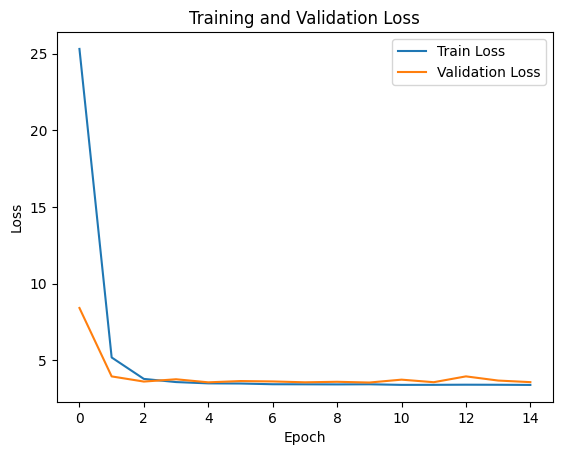

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3759
Mean Squared Error on Test Data: 3.49611234664917


In [12]:
learning_rate = 0.001
dropout_rate = 0.15
batch_size = 32
num_epochs = 20
encoding_size = 16

# Define your model architecture
class GatedLinearUnit(layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.linear = layers.Dense(units)
        self.sigmoid = layers.Dense(units, activation="sigmoid")

    def call(self, inputs):
        return self.linear(inputs) * self.sigmoid(inputs)

class GatedResidualNetwork(layers.Layer):
    def __init__(self, units, dropout_rate):
        super().__init__()
        self.units = units
        self.elu_dense = layers.Dense(units, activation="elu")
        self.linear_dense = layers.Dense(units)
        self.dropout = layers.Dropout(dropout_rate)
        self.gated_linear_unit = GatedLinearUnit(units)
        self.layer_norm = layers.LayerNormalization()
        self.project = layers.Dense(units)

    def call(self, inputs):
        # Ensure inputs are at least 2D
        if len(inputs.shape) == 1:
            inputs = tf.expand_dims(inputs, axis=1)

        x = self.elu_dense(inputs)
        x = self.linear_dense(x)
        x = self.dropout(x)
        if inputs.shape[-1] != self.units:
            inputs = self.project(inputs)
        x = inputs + self.gated_linear_unit(x)
        x = self.layer_norm(x)
        return x

class VariableSelection(layers.Layer):
    def __init__(self, num_features, units, dropout_rate):
        super().__init__()
        self.grns = list()
        # Create a GRN for each feature independently
        for _ in range(num_features):
            grn = GatedResidualNetwork(units, dropout_rate)
            self.grns.append(grn)
        # Create a GRN for the concatenation of all the features
        self.grn_concat = GatedResidualNetwork(units, dropout_rate)
        self.softmax = layers.Dense(units=num_features, activation="softmax")

    def call(self, inputs):
        x_list = [grn(input_) for grn, input_ in zip(self.grns, tf.unstack(inputs, axis=1))]
        v = layers.concatenate(x_list)
        v = self.grn_concat(v)
        v = tf.expand_dims(self.softmax(v), axis=-1)

        outputs = tf.reduce_sum(v * tf.stack(x_list, axis=1), axis=1)
        return outputs



early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, verbose=1, restore_best_weights=True
)

def create_model(encoding_size, num_features):
    inputs = keras.Input(shape=(num_features,))
    features = VariableSelection(num_features, encoding_size, dropout_rate)(inputs)
    outputs = layers.Dense(units=1, activation="linear")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Define the number of features
num_features = X_train2.shape[1]

# Create the model
model_nn = create_model(encoding_size, num_features)

# Compile the model
model_nn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_nn.fit(X_train2, y_train2, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, 
                    callbacks=[early_stopping])

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model on test data
mse = model_nn.evaluate(X_test2, y_test2)
print("Mean Squared Error on Test Data:", mse)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.5197 - val_loss: 3.4053
Epoch 2/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2908 - val_loss: 3.4597
Epoch 3/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3403 - val_loss: 3.8922
Epoch 4/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2540 - val_loss: 3.4583
Epoch 5/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3176 - val_loss: 3.4121
Epoch 6/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4294 - val_loss: 3.4266
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 3.2499
Mean Squared Error on Validation Data: 3.405266761779785


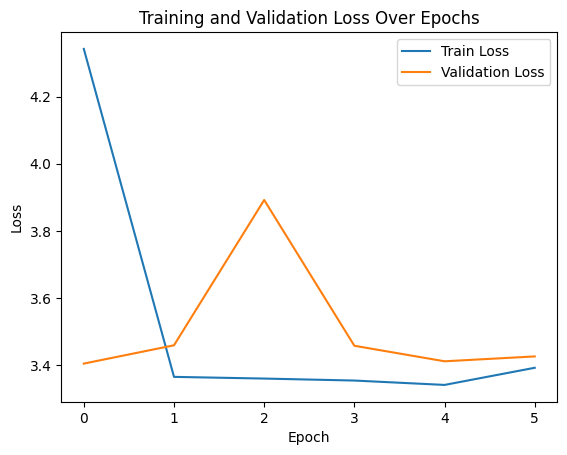

In [13]:
# Define the neural network architecture
model_nn2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train2.shape[1],)),  # Use shape of X_train2
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])


learning_rate = 0.001

# Compile the model with specified learning rate
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
# Compile the model
model_nn2.compile(optimizer=optimizer, loss='mean_squared_error')

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, verbose=1, restore_best_weights=True
)

# Train the model with early stopping
history = model_nn2.fit(X_train2, y_train2, epochs=50, batch_size=32, 
                        validation_data=(X_test2, y_test2), 
                        callbacks=[early_stopping])

# Evaluate the model
loss = model_nn2.evaluate(X_test2, y_test2)
print("Mean Squared Error on Validation Data:", loss)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


In [14]:
final_pred1 = hist_minmax.predict(test_minmax)
final_pred2 = hist_standard.predict(test_standard)
final_pred3 = hist_robust.predict(test_robust)
final_pred4 = hist_power.predict(test_power) 

final_pred5 = cat_minmax.predict(test_minmax)
final_pred6 = cat_standard.predict(test_standard)
final_pred7 = cat_robust.predict(test_robust)
final_pred8 = cat_power.predict(test_power) 

final_pred9 = xgb_minmax.predict(test_minmax)
final_pred10 = xgb_standard.predict(test_standard)
final_pred11 = xgb_robust.predict(test_robust)
final_pred12 = xgb_power.predict(test_power) 

final_pred13 = lgbm_minmax.predict(test_minmax)
final_pred14 = lgbm_standard.predict(test_standard)
final_pred15 = lgbm_robust.predict(test_robust)
final_pred16 = lgbm_power.predict(test_power) 

final_pred17 = models[0].predict(test_minmax)
final_pred18 = models[1].predict(test_standard)
final_pred19 = models[2].predict(test_robust)
final_pred20 = models[3].predict(test_power)

final_pred21 = models2[0].predict(test_minmax)
final_pred22 = models2[1].predict(test_standard)
final_pred23 = models2[2].predict(test_robust)
final_pred24 = models2[3].predict(test_power)

[LightGBM] [Warning] feature_fraction is set=0.5634861337481553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5634861337481553
[LightGBM] [Warning] lambda_l2 is set=8.849585747359841, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.849585747359841
[LightGBM] [Warning] lambda_l1 is set=3.564219312013194e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.564219312013194e-08
[LightGBM] [Warning] bagging_fraction is set=0.9193958826487351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9193958826487351
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7116844228431595, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7116844228431595
[LightGBM] [Warning] lambda_l2 is set=4.654572112508546, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.654572112508546
[LightGBM] [Warning] lambda_l1 is 

In [15]:
# Create DataFrames for each set of new predictions
Fpredictions_df1 = pd.DataFrame({
    'pred1': final_pred1,
    'pred2': final_pred2,
    'pred3': final_pred3,
    'pred4': final_pred4
})

Fpredictions_df2 = pd.DataFrame({
    'pred5': final_pred5,
    'pred6': final_pred6,
    'pred7': final_pred7,
    'pred8': final_pred8
})

Fpredictions_df3 = pd.DataFrame({
    'pred9': final_pred9,
    'pred10': final_pred10,
    'pred11': final_pred11,
    'pred12': final_pred12
})

Fpredictions_df4 = pd.DataFrame({
    'pred13': final_pred13,
    'pred14': final_pred14,
    'pred15': final_pred15,
    'pred16': final_pred16
})

Fpredictions_df5 = pd.DataFrame({
    'pred17': final_pred13,
    'pred18': final_pred14,
    'pred19': final_pred15,
    'pred20': final_pred16
})

Fpredictions_df6 = pd.DataFrame({
    'pred21': final_pred13,
    'pred22': final_pred14,
    'pred23': final_pred15,
    'pred24': final_pred16
})

# Concatenate all new predictions along columns
new_predictions_df = pd.concat([Fpredictions_df1, Fpredictions_df2, 
                                Fpredictions_df3, Fpredictions_df4,
                                Fpredictions_df5, Fpredictions_df6], axis=1)

new_predictions_df.shape

(60411, 24)

In [16]:
one = hist_final.predict(new_predictions_df)
two = gbr_final.predict(new_predictions_df)
three = xgb_final.predict(new_predictions_df)
four = light_final.predict(new_predictions_df)
five = cat_final.predict(new_predictions_df)
six = model_nn.predict(new_predictions_df)
seven = model_nn2.predict(new_predictions_df)

[LightGBM] [Warning] feature_fraction is set=0.6883276318018452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6883276318018452
[LightGBM] [Warning] lambda_l2 is set=0.06251664372297268, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06251664372297268
[LightGBM] [Warning] lambda_l1 is set=8.793792624502898e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.793792624502898e-07
[LightGBM] [Warning] bagging_fraction is set=0.855272048081908, subsample=1.0 will be ignored. Current value: bagging_fraction=0.855272048081908
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/tmp/ipykernel_33/3700682469.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(preds, label=model_names_final[i], color=colors[i], shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/3700682469.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(preds, label=model_names_final[i], color=colors[i], shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

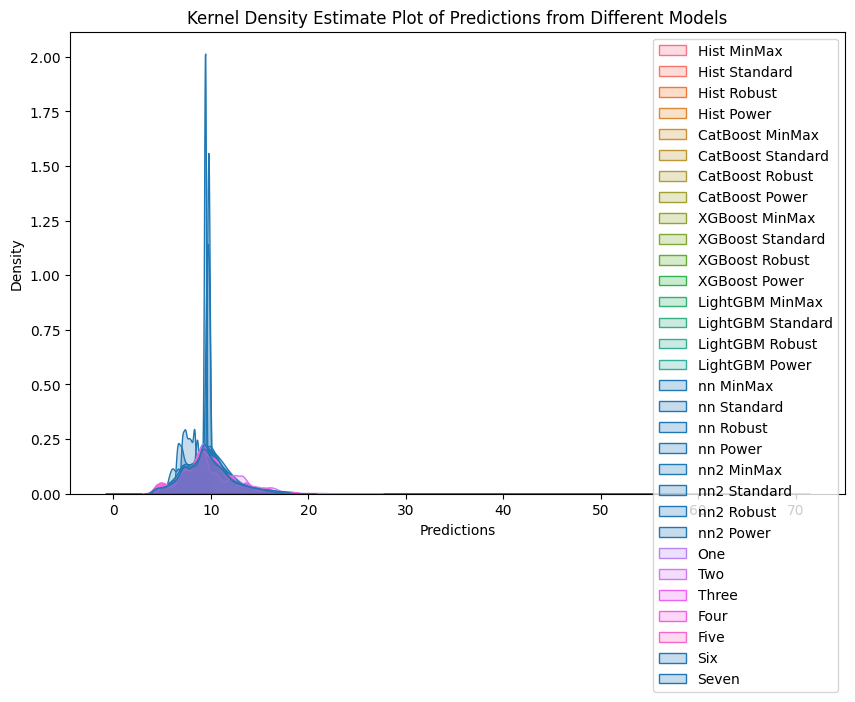

In [17]:
# List of final predictions arrays
final_predictions = [
    final_pred1, final_pred2, final_pred3, final_pred4,
    final_pred5, final_pred6, final_pred7, final_pred8,
    final_pred9, final_pred10, final_pred11, final_pred12,
    final_pred13, final_pred14, final_pred15, final_pred16,
    final_pred17, final_pred18, final_pred19, final_pred20,
    final_pred21, final_pred22, final_pred23, final_pred24
]

# List of model names for final predictions
model_names_final = [
    'Hist MinMax', 'Hist Standard', 'Hist Robust', 'Hist Power',
    'CatBoost MinMax', 'CatBoost Standard', 'CatBoost Robust', 'CatBoost Power',
    'XGBoost MinMax', 'XGBoost Standard', 'XGBoost Robust', 'XGBoost Power',
    'LightGBM MinMax', 'LightGBM Standard', 'LightGBM Robust', 'LightGBM Power',
    'nn MinMax', 'nn Standard', 'nn Robust', 'nn Power',
    'nn2 MinMax', 'nn2 Standard', 'nn2 Robust', 'nn2 Power'
]

# List of additional predictions arrays
additional_predictions = [one, two, three, four, five, six, seven]

# List of model names for additional predictions
additional_model_names = ['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven']

# Ensure that the number of colors matches the number of models
colors = sns.color_palette("husl", len(model_names_final) + len(additional_model_names))

# Plot KDE for final predictions
plt.figure(figsize=(10, 6))
for i, preds in enumerate(final_predictions):
    sns.kdeplot(preds, label=model_names_final[i], color=colors[i], shade=True)

# Plot KDE for additional predictions
for j, preds in enumerate(additional_predictions):
    sns.kdeplot(preds, label=additional_model_names[j], color=colors[len(model_names_final) + j], shade=True)

plt.xlabel('Predictions')
plt.ylabel('Density')
plt.title('Kernel Density Estimate Plot of Predictions from Different Models')
plt.legend()
plt.show()

# Predictions

In [19]:
tester1 = [one, three, four, five]

# Convert the arrays to numpy arrays
tester1 = [np.array(arr) for arr in tester1]

# Calculate the mean across arrays at each index
mean_tester1 = np.mean(tester1, axis=0)

# pd.DataFrame(mean_tester1).to_csv('tester1.csv', index=False)

In [20]:
# Create a list containing all the arrays
tester2 = [final_pred1, final_pred2, final_pred3, final_pred4,
          final_pred5, final_pred6, final_pred7, final_pred8,
          final_pred9, final_pred10, final_pred11, final_pred12,
          final_pred13, final_pred14, final_pred15, final_pred16,
          final_pred17.squeeze(), final_pred18.squeeze(), final_pred19.squeeze(), final_pred20.squeeze(), 
          final_pred21.squeeze(), final_pred22.squeeze(), final_pred23.squeeze(), final_pred24.squeeze(),
          one, two, three, four, five, six.squeeze(), seven.squeeze()]

# Convert arrays to NumPy arrays
tester2 = [np.array(arr) for arr in tester2]


# Calculate the mean across all arrays
mean_tester2 = np.mean(tester2, axis=0)
# pd.DataFrame(mean_tester2).to_csv('tester2.csv', index=False)

In [21]:
tester3 = [final_pred1, final_pred2, final_pred3, final_pred4,
          final_pred5, final_pred6, final_pred7, final_pred8,
          final_pred9, final_pred10, final_pred11, final_pred12,
          final_pred13, final_pred14, final_pred15, final_pred16,
          one, two, three, four, five, six.squeeze(), seven.squeeze()]

# Convert arrays to NumPy arrays
tester3 = [np.array(arr) for arr in tester3]


# Calculate the mean across all arrays
mean_tester3 = np.mean(tester3, axis=0)

# pd.DataFrame(mean_tester3).to_csv('tester3.csv', index=False)

In [22]:
tester4 = [final_pred1, final_pred2, final_pred3, final_pred4,
          final_pred5, final_pred6, final_pred7, final_pred8,
          final_pred9, final_pred10, final_pred11, final_pred12,
          final_pred13, final_pred14, final_pred15, final_pred16,
          one, two, three, four, five]

# Convert arrays to NumPy arrays
tester4 = [np.array(arr) for arr in tester4]


# Calculate the mean across all arrays
mean_tester4 = np.mean(tester4, axis=0)

# pd.DataFrame(mean_tester4).to_csv('tester4.csv', index=False)

In [23]:
# I will submit test3

sub = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')
ids = sub['id']
subtest3 = pd.DataFrame({'id': ids, 'Rings': mean_tester3})
subtest3.to_csv('submission.csv', index=False)